In [2]:
pip install imageio[ffmpeg]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 26.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Loading file ../../data/GPM/2024/3B-HHR.MS.MRG.3IMERG.20240101-S000000-E002959.0000.V07B.nc
precipitation.shape: (3600, 1800)
(3600,) (1800,) (3600, 1800)
(1800, 3600) (1800, 3600) (3600, 1800)
Loading file ../../data/GPM/2024/3B-HHR.MS.MRG.3IMERG.20240101-S003000-E005959.0030.V07B.nc
precipitation.shape: (3600, 1800)
(3600,) (1800,) (3600, 1800)
(1800, 3600) (1800, 3600) (3600, 1800)
Loading file ../../data/GPM/2024/3B-HHR.MS.MRG.3IMERG.20240101-S010000-E012959.0060.V07B.nc
precipitation.shape: (3600, 1800)
(3600,) (1800,) (3600, 1800)
(1800, 3600) (1800, 3600) (3600, 1800)
Loading file ../../data/GPM/2024/3B-HHR.MS.MRG.3IMERG.20240101-S013000-E015959.0090.V07B.nc
precipitation.shape: (3600, 1800)
(3600,) (1800,) (3600, 1800)
(1800, 3600) (1800, 3600) (3600, 1800)
Loading file ../../data/GPM/2024/3B-HHR.MS.MRG.3IMERG.20240101-S020000-E022959.0120.V07B.nc
precipitation.shape: (3600, 1800)
(3600,) (1800,) (3600, 1800)
(1800, 3600) (1800, 3600) (3600, 1800)
Loading file ../../data/GPM/20

/tmp/ipykernel_15718/1429182320.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(frame))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 600) to (1008, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Animation saved as ./imerg_animation_2024_01_01.mp4


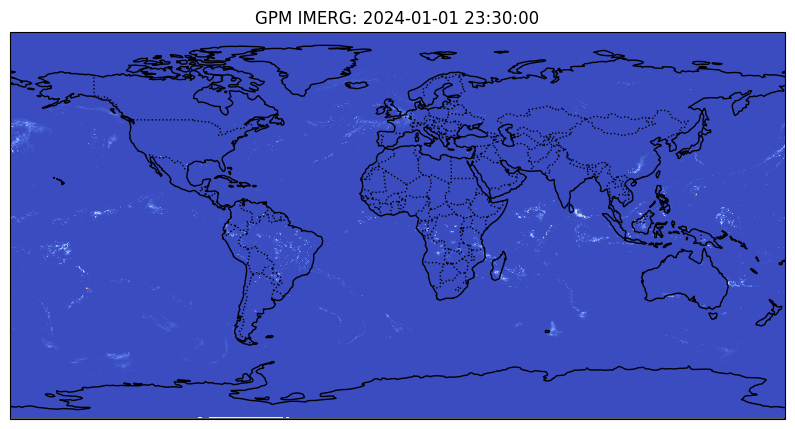

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import imageio

def create_imerg_animation(input_dir, output_file):
    # Ensure the output directory exists
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    # Get all NetCDF files in the input directory
    files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc')])
    if not files:
        print("No IMERG NetCDF files found in the input directory.")
        return

    # List to store temporary frame files
    frames = []

    # Create a figure for visualization
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))

    for file in files:
        # Load data from NetCDF
        print(f'Loading file {file}')
        data = xr.open_dataset(file)
        lats = data['lat'].values
        lons = data['lon'].values
        precipitation = data['precipitation'].values[0]  # Assuming time is the first dimension
        print('precipitation.shape:', precipitation.shape)

        # Plot data
        ax.clear()
        ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()])
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, edgecolor='black')

        print(lons.shape, lats.shape, precipitation.shape)
        Y,X=np.meshgrid(lons, lats)
        print(Y.shape, X.shape, precipitation.shape)
        im = ax.pcolormesh(Y, X, precipitation[:-1, :-1].T, transform=ccrs.PlateCarree(), cmap='coolwarm')

        # plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label="Precipitation (mm/h)")
        plt.title(f"GPM IMERG: {data.time.values[0]}")  # Adjust as per dataset time format

        # Save the frame
        frame_file = f"frame_{len(frames):04d}.png"
        plt.savefig(frame_file)
        frames.append(frame_file)

        # Close the dataset to save memory
        data.close()

    # Create MP4 animation using imageio
    with imageio.get_writer(output_file, fps=2) as writer:
        for frame in frames:
            writer.append_data(imageio.imread(frame))

    # Clean up temporary frames
    for frame in frames:
        os.remove(frame)

    print(f"Animation saved as {output_file}")


# Example usage
input_directory = "../../data/GPM/2024"
output_animation = "./imerg_animation_2024_01_01.mp4"
create_imerg_animation(input_directory, output_animation)


In [33]:
precipitation[:-1, :-1].shape

(3599, 1799)

In [8]:
file = '../../data/GPM/2024/3B-HHR.MS.MRG.3IMERG.20240101-S000000-E002959.0000.V07B.nc'

data = xr.open_dataset(file)
lats = data['lat'].values
lons = data['lon'].values
precipitation = data['precipitation'].values[0]  # Assuming time is the first dimension
print('precipitation.shape:', precipitation.shape)

print(data.variables)

precipitation.shape: (3600, 1800)
Frozen({'MWprecipitation': <xarray.Variable (time: 1, lon: 3600, lat: 1800)>
[6480000 values with dtype=float32]
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          Observed merged microwave precipitation estimate;\n   ...
    origname:          MWprecipitation
    fullnamepath:      /Grid/Intermediate/MWprecipitation
    coordinates:       Grid_Intermediate_time Grid_Intermediate_lon Grid_Inte..., 'MWobservationTime': <xarray.Variable (time: 1, lon: 3600, lat: 1800)>
[6480000 values with dtype=timedelta64[ns]]
Attributes:
    DimensionNames:    time,lon,lat
    Units:             minutes
    CodeMissingValue:  -9999
    LongName:          \nObserved merged microwave observation time after\n  ...
    origname:          MWobservationTime
    fullnamepath:      /Grid/Intermediate/MWobservationTime
    coordinates:       Grid_Intermediate_time Grid_

In [15]:
data.precipitation[0].shape

(3600, 1800)

In [18]:
lons[:-1].shape, lons[:].shape

((3599,), (3600,))

In [9]:
data

<xarray.Dataset>
Dimensions:                         (time: 1, lon: 3600, lat: 1800, latv: 2,
                                     nv: 2, lonv: 2)
Coordinates:
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * latv                            (latv) int32 0 1
  * lon                             (lon) float32 -179.9 -179.9 ... 179.8 179.9
  * lonv                            (lonv) int32 0 1
  * nv                              (nv) int32 0 1
  * time                            (time) object 2024-01-01 00:00:00
Data variables: (12/13)
    MWprecipitation                 (time, lon, lat) float32 ...
    MWobservationTime               (time, lon, lat) timedelta64[ns] ...
    IRprecipitation                 (time, lon, lat) float32 ...
    MWprecipSource                  (time, lon, lat) float32 ...
    IRinfluence                     (time, lon, lat) float32 ...
    precipitationUncal              (time, lon, lat) float32 ...
    ...                              ...
    lat_bnds                        (lat, latv) float32 ...
    precipitation                   (time, lon, lat) float32 nan nan ... 0.0 0.0
    probabilityLiquidPrecipitation  (time, lon, lat) float32 ...
    randomError                     (time, lon, lat) float32 ...
    time_bnds                       (time, nv) object ...
    lon_bnds                        (lon, lonv) float32 ...
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/07;\nDOIauth...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2024-12-09 11:07:56 GMT Hyrax-1.16.3 htt...

In [10]:
data.lat

<xarray.DataArray 'lat' (lat: 1800)>
array([-89.95, -89.85, -89.75, ...,  89.75,  89.85,  89.95], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Attributes:
    DimensionNames:  lat
    Units:           degrees_north
    units:           degrees_north
    standard_name:   latitude
    LongName:        Latitude at the center of\n\t\t\t0.10 degree grid interv...
    bounds:          lat_bnds
    axis:            Y
    origname:        lat
    fullnamepath:    /Grid/lat

In [ ]:
da

In [11]:
data.latv

<xarray.DataArray 'latv' (latv: 2)>
array([0, 1], dtype=int32)
Coordinates:
  * latv     (latv) int32 0 1
Attributes:
    DimensionNames:  latv
    standard_name:   numberlatbnds
    LongName:        Number of latitude bounds.

(287,) (251,) (250, 286)
(251, 287) (251, 287) (250, 286)


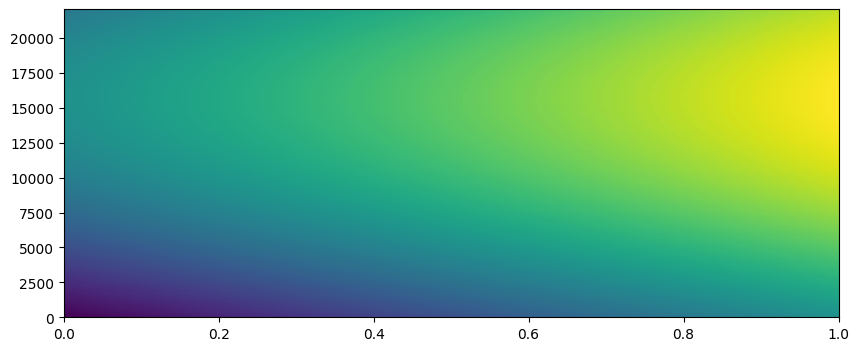

In [29]:
import matplotlib.pyplot as plt
import numpy as np

times=np.linspace(0, 1, 251)
freqs=np.linspace(0, 22050, 287)
amplitudes = 1+np.sin(freqs[None,1:]*1e-4)+times[1:,None]

print(freqs.shape, times.shape, amplitudes.shape)

plt.figure(figsize=(10, 4))
# plt.pcolormesh(times, freqs, amplitudes, shading='auto')

Y,X=np.meshgrid(freqs, times)
plt.pcolormesh(X, Y, amplitudes, shading='auto')
print(Y.shape, X.shape, amplitudes.shape)

# References
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html
- https://github.com/aus-ref-clim-data-nci/GPM
- https://colab.research.google.com/drive/1FcN0dNlGiuguGZu-QMUTxqLunjR0UhZD?usp=sharing
- [Interactive representation of IMERG Precipitation with Python over Germany](https://github.com/SaulMontoya/Interactive-representation-of-IMERG-Precipitation-with-Python-over-Germany)
- https://www.heywhale.com/mw/notebook/646e0ef8bf6378dc9094c10f
- [Download GPM IMERG 30-min Rainfall Data in netCDF format using Python (part 2)](https://www.youtube.com/watch?v=T_Us4hJxSeI) 